<a href="https://colab.research.google.com/github/anapitalai/gee/blob/main/carto_ee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install cartopy scipy matplotlib python-dotenv


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 11.4 MB/s eta 0:00:00


In [1]:
%matplotlib inline
%pylab inline
import numpy as np
import pandas as pd
import ee
import os
import geemap
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from dotenv import load_dotenv

# import the cartoee functionality from geemap
from geemap import cartoee
import cartopy.io.img_tiles as cimgt
from cartopy.mpl.geoaxes import GeoAxes, GeoAxesSubplot




Populating the interactive namespace from numpy and matplotlib


In [2]:
dotenv_path = '/content/drive/MyDrive/env/.env'
load_dotenv(dotenv_path=dotenv_path)

# Access the environment variables
project_name = os.getenv("project_name")

ee.Authenticate()
ee.Initialize(project=project_name)

In [4]:
Map = geemap.Map()

image = (
    ee.ImageCollection("MODIS/MCD43A4_006_NDVI")
    .filter(ee.Filter.date("2022-04-01", "2024-01-01"))  ##("2018-04-01", "2018-05-01")
    .select("NDVI")
    .first()
)

vis_params = {
    "min": 0.0,
    "max": 1.0,
    "palette": [
        "FFFFFF",
        "CE7E45",
        "DF923D",
        "F1B555",
        "FCD163",
        "99B718",
        "74A901",
        "66A000",
        "529400",
        "3E8601",
        "207401",
        "056201",
        "004C00",
        "023B01",
        "012E01",
        "011D01",
        "011301",
    ],
}
Map.set_center(146.677, -6.677, 8)
Map.addLayer(image, vis_params, "MODIS NDVI")
countries = ee.FeatureCollection("users/giswqs/public/countries")
style = {"color": "00000088", "width": 1, "fillColor": "00000000"}
Map.addLayer(countries.style(**style), {}, "Countries")
ndvi = image.visualize(**vis_params)
blend = ndvi.blend(countries.style(**style))
Map.addLayer(blend, {}, "Blend")
Map

Map(center=[-6.677, 146.677], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDat…

In [5]:
# specify region to focus on
bbox = [180, -88, -180, 88]
zoom_region = [140.0, -12.0, 156.0, -1.0]
#zoom_region = [140.0, -12.0, 160.0, 0]


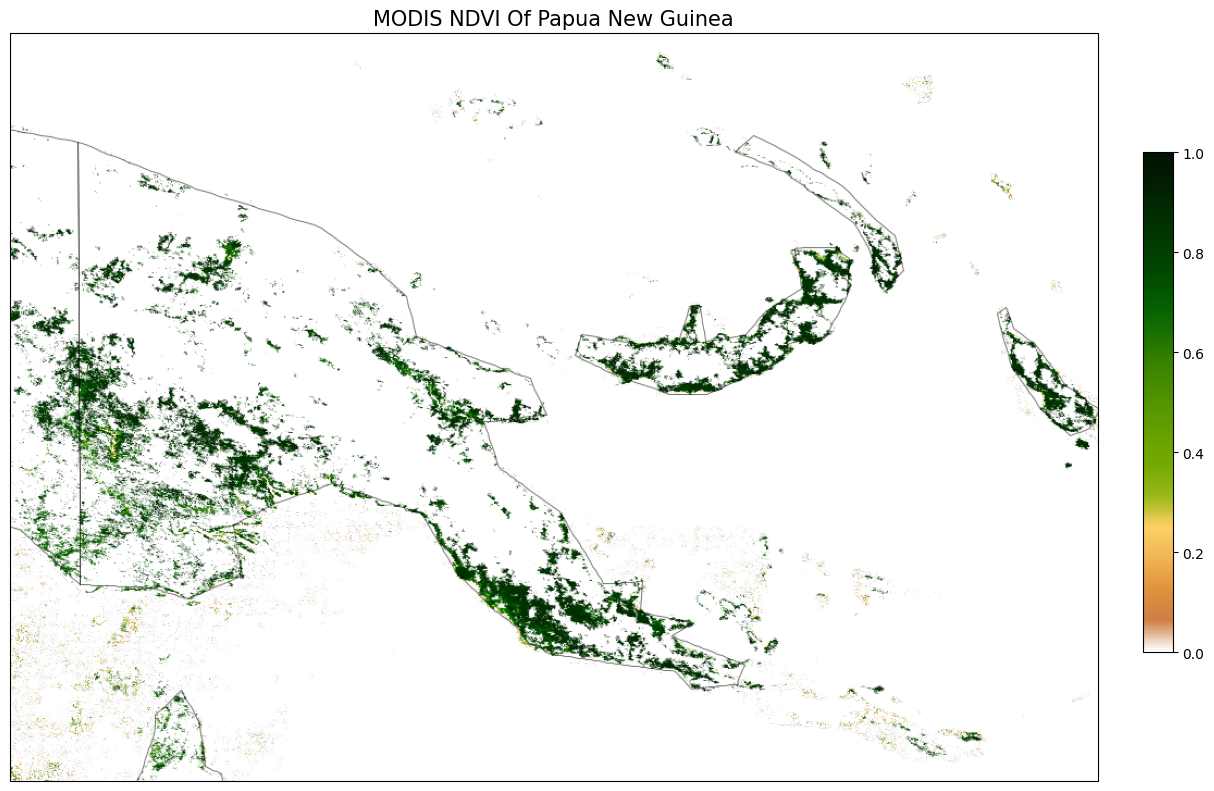

In [6]:

#projection=ccrs.Mercator()
#crs="EPSG:32620"
#projection = ccrs.EqualEarth(central_longitude=-180)
fig = plt.figure(figsize=(15, 10))
ax = cartoee.get_map(blend, region=zoom_region)
#ax = cartoee.get_map(blend, region=bbox, proj=projection
cb = cartoee.add_colorbar(ax, vis_params=vis_params, loc="right")

ax.set_title(label="MODIS NDVI Of Papua New Guinea", fontsize=15)

# ax.coastlines()
plt.show()

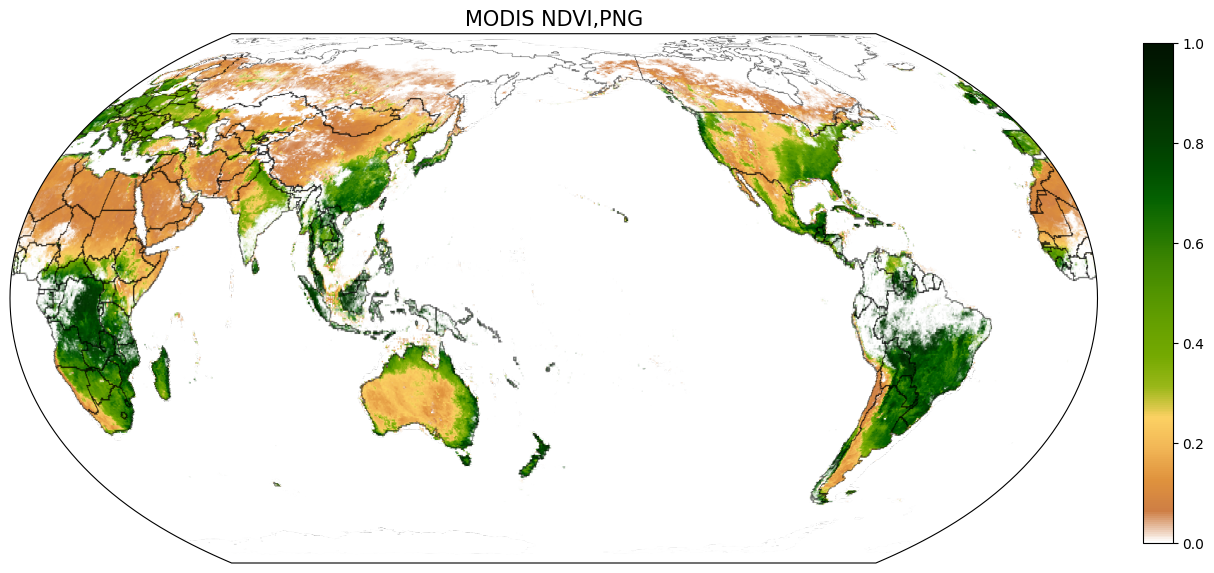

In [7]:
fig = plt.figure(figsize=(15, 10))

projection = ccrs.EqualEarth(central_longitude=-180)

# plot the result with cartoee using a PlateCarre projection (default)
ax = cartoee.get_map(blend, region=bbox, proj=projection,zoom_level=8)
cb = cartoee.add_colorbar(ax, vis_params=vis_params, loc="right")

ax.set_title(label="MODIS NDVI,PNG", fontsize=15)

# ax.coastlines()
plt.show()

In [ ]:
dataset = ee.ImageCollection('LANDSAT/LC08/C02/T1_L2').filterDate(
    '2025-01-01', '2025-02-01'
).filterMetadata('CLOUD_COVER', 'less_than', 50)

#image=dataset.getInfo()
print(image)
#dataset=dataset.median().reproject(crs="EPSG:4326", scale=30)
# Get the ID of the single image.
#image_id = single_image.get('system:id').getInfo()

#print(image_id)


# Applies scaling factors.
def apply_scale_factors(image):
  optical_bands = image.select('SR_B.').multiply(0.0000275).add(-0.2)
  thermal_bands = image.select('ST_B.*').multiply(0.00341802).add(149.0)
  return image.addBands(optical_bands, None, True).addBands(
      thermal_bands, None, True
  )

dataset = dataset.map(apply_scale_factors)
zoom_region = [140.0, -12.0, 156.0, -1.0]
#composite = dataset.median().reproject(crs='EPSG:3857', scale=30)

vis = {
    'bands': ['SR_B4', 'SR_B3', 'SR_B2'],
    'min': 0.0,
    'max': 0.3,
}

# countries = ee.FeatureCollection("users/giswqs/public/countries")
# style = {"color": "00000088", "width": 1, "fillColor": "00000000"}

# ndvi = image.visualize(**vis_params)
# blend = ndvi.blend(countries.style(**style))
# Map.addLayer(blend, {}, "Blend")


Map = geemap.Map()
#Map.addLayer(countries.style(**style), {}, "Countries")
Map.set_center(146.677, -6.677, 8)
# Map.addLayer(countries, style,'COUNTRY')

Map.addLayer(dataset, vis,'True Color (432)')
Map


Help on method set_extent in module cartopy.mpl.geoaxes:

set_extent(extents, crs=None) method of cartopy.mpl.geoaxes.GeoAxes instance
    Set the extent (x0, x1, y0, y1) of the map in the given
    coordinate system.
    
    If no crs is given, the extents' coordinate system will be assumed
    to be the Geodetic version of this axes' projection.
    
    Parameters
    ----------
    extents
        Tuple of floats representing the required extent (x0, x1, y0, y1).

Help on function get_map in module geemap.cartoee:

get_map(ee_object, proj=None, basemap=None, zoom_level=2, **kwargs)
    Wrapper function to create a new cartopy plot with project and adds Earth
    Engine image results
    Args:
        ee_object (ee.Image | ee.FeatureCollection): Earth Engine image result to plot
        proj (cartopy.crs, optional): Cartopy projection that determines the projection of the resulting plot. By default uses an equirectangular projection, PlateCarree
        basemap (str, optional): Bas

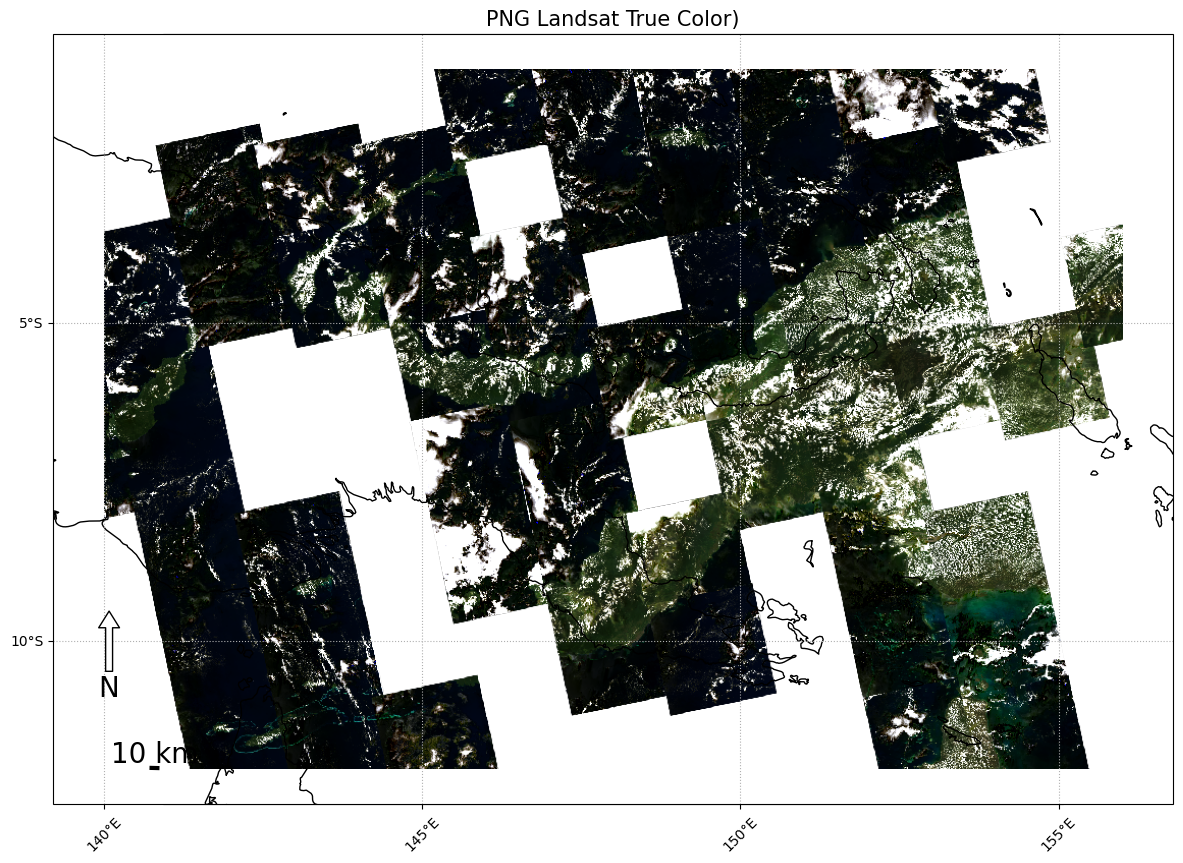

In [8]:

#zoom_region=[E,S,W,N]
#zoom_region = [140.0, -12.0, 156.0, -1.0]
#zoom_region = [180, -60, -180, 85]
#zoom_region = [180, -60, -180, 85]

#projection = ccrs.Mollweide(central_longitude=-180)
#projection = ccrs.PlateCarree()
projection=ccrs.Mercator()
#projection=ccrs.Geodetic()
#crs="EPSG:32620"
#projection = ccrs.EqualEarth(central_longitude=-180)


fig = plt.figure(figsize=(15, 10))


extent = [140.842, -11.636, 156.019, -1.346]
ax = plt.subplot(projection=projection)
#ax.set_extent(extent)
help(ax.set_extent)

# use cartoee to get a map
ax = cartoee.get_map(dataset, vis_params=vis,region=zoom_region)
help(cartoee.get_map)

# pad the view for some visual appeal
cartoee.pad_view(ax)
##add extents
#ax.imshow(img, origin='upper', extent=img_extents,transform=proj)

# add the gridlines and specify that the xtick labels be rotated 45 degrees
cartoee.add_gridlines(ax, interval=5, xtick_rotation=45, linestyle=":")

# add the coastline
ax.coastlines(color="black")
# add north arrow
cartoee.add_north_arrow(
    ax, text="N", xy=(0.05, 0.25), text_color="black", arrow_color="white", fontsize=20
)

# add scale bar
cartoee.add_scale_bar_lite(
    ax, length=10, xy=(0.1, 0.05), fontsize=20, color="black", unit="km"
)

ax.set_title(label="PNG Landsat True Color)", fontsize=15)

# Save the plot by calling plt.savefig() BEFORE plt.show()
# plt.savefig("rgb.pdf")
# plt.savefig("rgb.jpg", dpi=300)
plt.show()



Try Sentinel Data 2 instead to make a map. Tried landsat8 above the images
dont align.

In [19]:
roi_in_png = ee.Geometry.Point([147.0, -6.0])

Map = geemap.Map()
map=geemap.Map(center=[-6.677,146.677],zoom=12)
collection = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED') \
.filterDate('2024-01-01', '2025-01-31') \
.filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 20)).filterBounds(roi_in_png)

image = collection.first()
# Get the ID of the single image.
image_id = image.get('system:id').getInfo()
print(image_id)

vis = {
'min': 0.0,
'max': 3000,
'bands': ['B4', 'B3', 'B2'],
}
Map.setCenter(146.677,-6.677, 12)
Map.addLayer(image, vis, 'Sentinel-2')
Map

COPERNICUS/S2_SR_HARMONIZED/20240101T003701_20240101T003700_T55MEP


Map(center=[-6.677, 146.677], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDat…

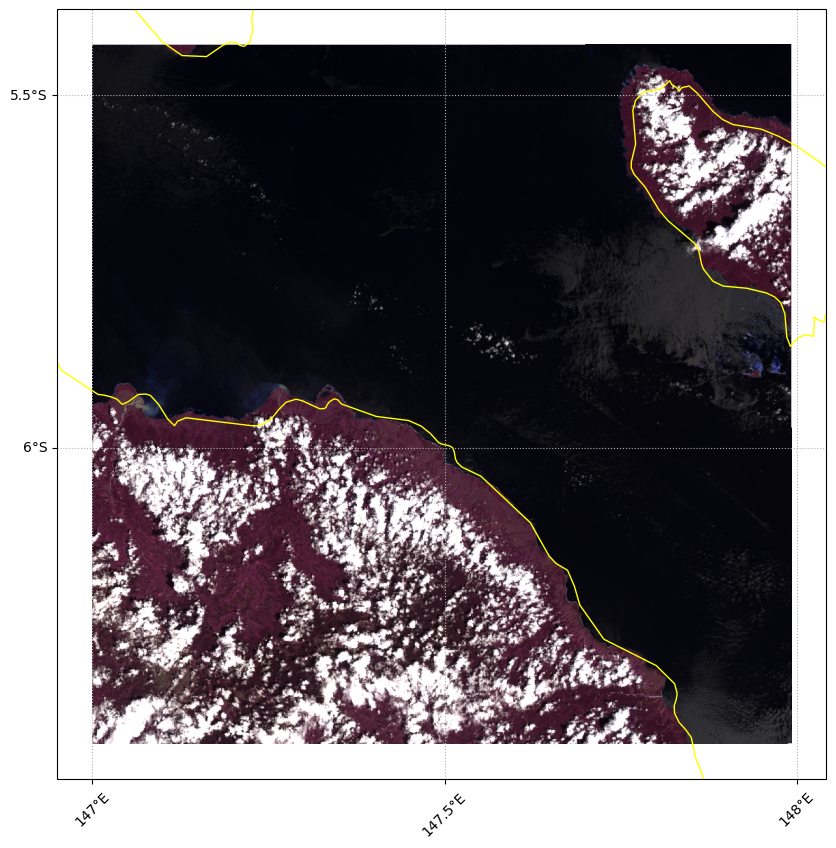

In [20]:

##plot a single image


# get a landsat image to visualize
image = ee.Image("COPERNICUS/S2_SR_HARMONIZED/20240101T003701_20240101T003700_T55MEP")

# define the visualization parameters to view
vis = {"bands": ["B5", "B4", "B3"], "min": 0, "max": 5000, "gamma": 1.3}

fig = plt.figure(figsize=(15, 10))

# use cartoee to get a map
ax = cartoee.get_map(image, vis_params=vis)

# pad the view for some visual appeal
cartoee.pad_view(ax)

# add the gridlines and specify that the xtick labels be rotated 45 degrees
cartoee.add_gridlines(ax, interval=0.5, xtick_rotation=45, linestyle=":")

# add the coastline
ax.coastlines(color="yellow")

plt.show()
